In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 58 kB 6.9 MB/s 
     |████████████████████████████████| 85 kB 1.2 MB/s 
     |████████████████████████████████| 5.2 MB 54.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 88 kB 9.0 MB/s 
     |████████████████████████████████| 4.4 MB 52.7 MB/s 
     |████████████████████████████████| 1.2 MB 57.3 MB/s 
     |████████████████████████████████| 101 kB 14.5 MB/s 
     |████████████████████████████████| 636 kB 71.9 MB/s 
     |████████████████████████████████| 6.6 MB 59.0 MB/s 
     |████████████████████████████████| 1.1 MB 65.9 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2342103 sha256=d0d5801092bb922a0288b8c187d9ae47560970261731eec39c139330fc3c3a52
  Stored in directory: /root/.cache

In [ ]:
!pip install pyvis
!pip install bertopic[flair]
!pip install bertopic[gensim]
!pip install bertopic[spacy]
!pip install bertopic[use]
!pip install spacytextblob
!python -m textblob.download_corpora
!python -m spacy download en_core_web_sm
!pip install octis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pyvis: filename=pyvis-0.2.1-py3-none-any.whl size=23688 sha256=eacfbb3d79cdc39922829e5e32a61ecf9f28a28b47879ae437a94f83cbe54360
  Stored in directory: /root/.cache/pip/wheels/2a/8f/04/6340d46afc74f59cc857a594ca1a2a14a1f4cbd4fd6c2e9306
Successfully built pyvis
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 448 kB 33.4 MB/s 
     |████████████████████████████████| 776.7 MB 4.6 kB/s 
     |████████████████████████████████| 1.3 MB 58.9 MB/s 
     |████████████████████████████████| 981 kB 55.3 MB/s 
     |████████████████████████████████| 46 kB 4.5 MB/s 
     |████████████████████████████████| 788 kB 64.7 MB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
     |████████████████████████████████| 1.1 MB 52.2 MB/s 
     |████████████████████████████████| 19.7 MB 1.2 MB/s 
   

In [ ]:
import pandas as pd
import spacy
import numpy as np
import re
from tqdm.auto import tqdm
from bertopic import BERTopic
import networkx as nx
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
from pyvis.network import Network
from octis.evaluation_metrics.diversity_metrics import TopicDiversity
from octis.evaluation_metrics.coherence_metrics import Coherence
from octis.dataset.dataset import Dataset


In [ ]:
def removing_na(df, COLUMN):
  # remove the rows with NA
  df = df.loc[(df[COLUMN].isna() == False)]
  return df

In [ ]:
def preprocessing(df, COLUMN):
  # pre processing
  nlp = spacy.load("en_core_web_sm")
  texts = df[COLUMN]

  processed_texts = [text for text in tqdm(nlp.pipe(texts, 
                                              disable=["ner",
                                                       "parser"]),
                                          total=len(texts))]
  # lemmatizing, removing stop words and panctuation, lowercasing and taking nouns and adjectives
  lemmatized_texts = [[token.lemma_.lower() for token in doc if 
                    not token.is_punct and not token.is_stop and (token.pos_ == 'NOUN' or token.pos_ == 'ADJ')] for doc in processed_texts]
  # remove numbers
  lemmatized_texts = [[re.sub(r'^[0-9]+|^.$', '', word) for word in text] for text in lemmatized_texts]
  # remove empty values
  lemmatized_texts = [[token for token in text if token != ''] for text in lemmatized_texts]
  return lemmatized_texts

In [ ]:
df_prisoners_dilemmas = pd.read_csv('/content/gdrive/MyDrive/rania_thesis/prisoners_dilemma/prisoners_dilemmas.csv')

In [ ]:
df_keywords  = removing_na(df_prisoners_dilemmas, COLUMN = 'keywords')
df_abstracts  = removing_na(df_prisoners_dilemmas, COLUMN = 'abstract')

In [ ]:
list_keywords = df_keywords['keywords'].to_list()
list_abstracts = df_prisoners_dilemmas['abstract'].to_list()

In [ ]:
lemmatized_keywords = preprocessing(df_keywords, COLUMN = 'keywords')
lemmatized_abstracts = preprocessing(df_abstracts, COLUMN = 'abstract')

  0%|          | 0/1729 [00:00<?, ?it/s]

  0%|          | 0/2004 [00:00<?, ?it/s]

In [ ]:
allkeywords = []

for wordlist in lemmatized_keywords:
  string = ''
  string = ' '.join([str(item) for item in wordlist])
  allkeywords.append(string)


In [ ]:
allabstracts = []

for wordlist in lemmatized_abstracts:
  string = ''
  string = ' '.join([str(item) for item in wordlist])
  allabstracts.append(string)


# KEYWORDS

In [ ]:
model_keywords = BERTopic(embedding_model="paraphrase-MiniLM-L3-v2",min_topic_size = 7)


In [ ]:
topics_keywords, probabilities_keywords = model_keywords.fit_transform(allkeywords)

  0%|          | 0.00/63.9M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [ ]:
freq_keywords= model_keywords.get_topic_info()
print("Number of topics: {}".format( len(freq_keywords)))
freq_keywords

Number of topics: 40


,Topic,Count,Name
0,-1,498,-1_social_good_public_behavior
1,0,153,0_prisoner_dilemma_game_cooperation
2,1,104,1_game_good_public_theory
3,2,103,2_punishment_public_good_antisocial
4,3,87,3_student_college_game_male
5,4,66,4_strategy_game_decision_choice
6,5,60,5_emotion_emotional_brain_mind
7,6,48,6_conditional_cooperation_public_good
8,7,46,7_student_college_group_undergraduate
9,8,39,8_experiment_laboratory_good_public


In [ ]:
model_keywords.visualize_topics()

In [ ]:
model_keywords.visualize_barchart()

## **ABSTRACTS**


In [ ]:
model_abstracts = BERTopic(embedding_model="paraphrase-MiniLM-L3-v2", min_topic_size = 7)


In [ ]:
topics_abstracts, probabilities = model_abstracts.fit_transform(allabstracts)

In [ ]:
freq = model_abstracts.get_topic_info()
print("Number of topics: {}".format( len(freq)))
freq

Number of topics: 50


,Topic,Count,Name
0,-1,866,-1_group_cooperation_social_game
1,0,164,0_punishment_sanction_costly_sanctioning
2,1,131,1_prisoner_dilemma_strategy_game
3,2,51,2_sex_female_male_woman
4,3,41,3_contribution_public_good_voluntary
5,4,41,4_trust_truster_closeness_patient
6,5,40,5_resource_pool_request_common
7,6,35,6_contribution_good_provision_public
8,7,33,7_brain_human_cortex_neural
9,8,30,8_reward_cooperative_trial_real


In [ ]:
model_abstracts.visualize_topics()

In [ ]:
model_abstracts.visualize_barchart()

# KEYWORDS COHERENCE AND DIVERSITY


In [ ]:
dataset_keywords = Dataset()
dataset_keywords.load_custom_dataset_from_folder("/content/gdrive/MyDrive/rania_thesis/prisoners_dilemma/keywords")

In [ ]:
all_words = [word for words in dataset_keywords.get_corpus() for word in words]
bertopic_topics = [
    [
        vals[0] if vals[0] in all_words else all_words[0]
        for vals in model_keywords.get_topic(i)[:10]
    ]
    for i in range(len(set(topics_keywords)) - 1)
]

output_keywords = {"topics": bertopic_topics}


In [ ]:
npmi_keywords = Coherence(texts=dataset_keywords.get_corpus(), topk=10, measure="c_v")
topic_diversity_keywords = TopicDiversity(topk=10)

In [ ]:
npmi_keywords.score(output_keywords)

0.41637376223032274

In [ ]:
topic_diversity_keywords.score(output_keywords)

0.5128205128205128

# ABSTRACTS COHERENCE AND DIVERSITY


In [ ]:
dataset_abstracts = Dataset()
dataset_abstracts.load_custom_dataset_from_folder("/content/gdrive/MyDrive/rania_thesis/prisoners_dilemma/abstracts")

In [ ]:
all_words = [word for words in dataset_abstracts.get_corpus() for word in words]
bertopic_topics = [
    [
        vals[0] if vals[0] in all_words else all_words[0]
        for vals in model_abstracts.get_topic(i)[:10]
    ]
    for i in range(len(set(topics_abstracts)) - 1)
]

output_abstracts = {"topics": bertopic_topics}


In [ ]:
npmi_abs = Coherence(texts=dataset_abstracts.get_corpus(), topk=10, measure="c_v")
topic_diversity_abs= TopicDiversity(topk=10)

In [ ]:
npmi_abs.score(output_abstracts)

0.36093499782277005

In [ ]:
topic_diversity_abs.score(output_abstracts)

0.7448979591836735

# NETWORKS

In [ ]:
# create df with nodes and edges
def generate_edges(topic2words):
  word2topics = {}
  for key ,values in topic2words.items():
    for value in values:
      if value in word2topics:
        word2topics[value].append(key)
      else:
        word2topics[value] = [key]

  source = []
  target = []
  for topic, words in topic2words.items():
    for word in words:
      for top in word2topics[word]:
        if top != topic:
          source.append(f"{words[0]}\n{words[1]}")
          target_words = topic2words[top]
          target.append(f"{target_words[0]}\n{target_words[1]}")


  df = pd.DataFrame()
  df['source'] = source
  df['target'] = target
  df['weight'] = 1

  return df

In [ ]:
def create_dict_top2word(model):  
  topic2words = {}
  for topic in  model.get_topics():
    if topic not in [0, -1]:
      topic2words[topic] = [word[0] for word in model.get_topics()[topic]]
  return topic2words

In [ ]:
def df2network(edges_df):
  network = nx.from_pandas_edgelist(edges_df, source = 'source', target = 'target', edge_attr = 'weight',create_using=nx.MultiGraph())
  return network


## KEYWORDS NETWORK


In [ ]:
keywords_edges = generate_edges(create_dict_top2word(model_keywords))
keywords_edges.to_csv("BERT_keywords_prisoners_network.csv")

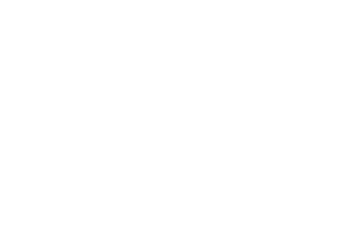

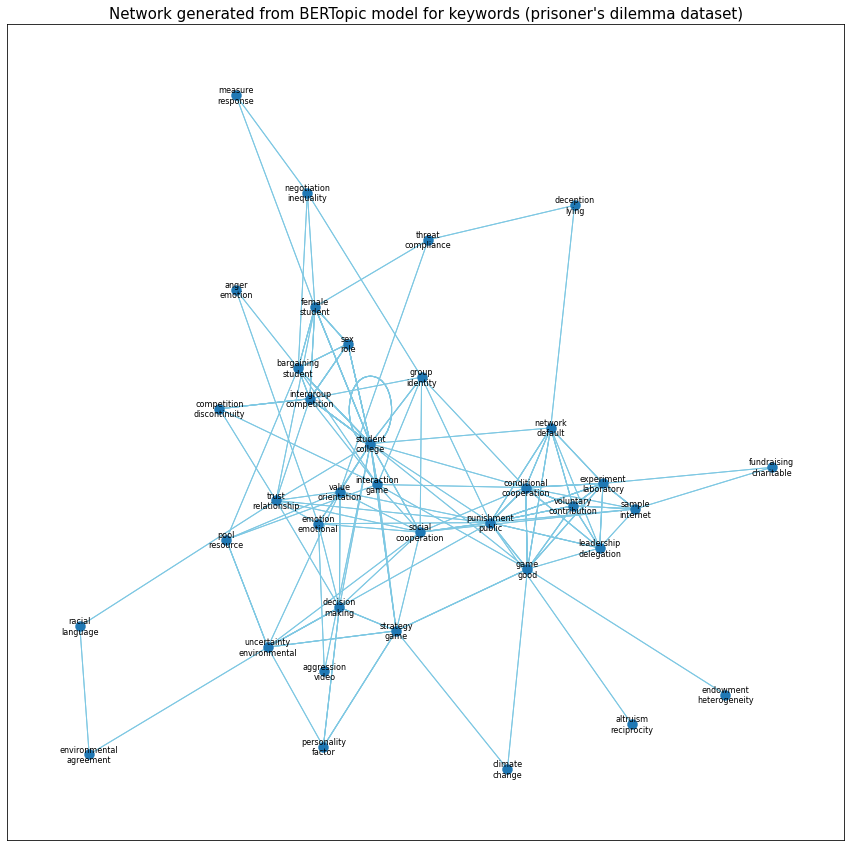

In [ ]:
#create plot 2D

limits = plt.axis("off")
fig, ax = plt.subplots(1, 1, figsize=(15,15))
ax.set_title('Network generated from BERTopic model for keywords (prisoner\'s dilemma dataset)', 
             fontdict = {'fontsize': 15})
nx.draw_networkx(df2network(keywords_edges), node_size = 100, ax = ax, 
                 edge_color = '#7EC8E3',  linewidths = 0.4, font_size = 8)
                 

In [ ]:
#create interactive plot network
net = Network(notebook=True)

net.from_nx(df2network(keywords_edges))

net.show("BERT_net_keywords_prisoners.html")

## ABSTRACTS NETWORK


In [ ]:
abstracts_edges = generate_edges(create_dict_top2word(model_abstracts))
abstracts_edges.to_csv("BERT_abstracts_prisoners_network_df.csv")

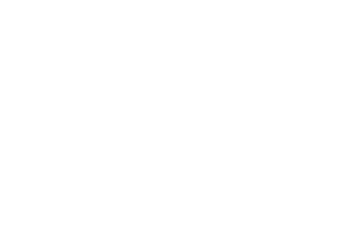

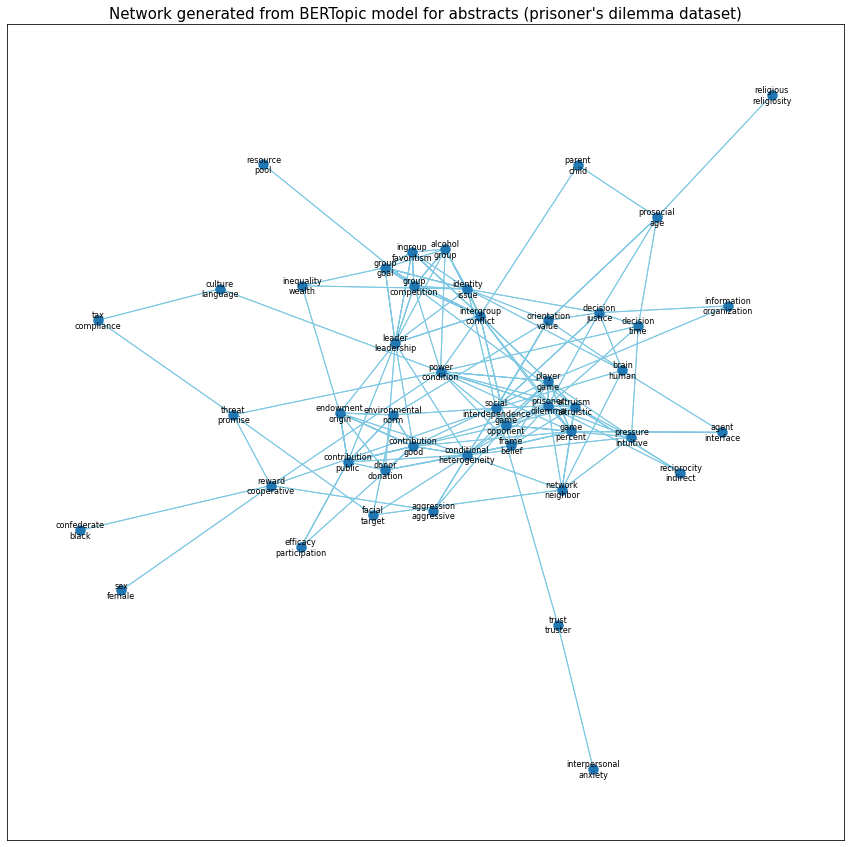

In [ ]:
#create plot 2D

limits = plt.axis("off")
fig, ax = plt.subplots(1, 1, figsize=(15,15))
ax.set_title('Network generated from BERTopic model for abstracts (prisoner\'s dilemma dataset)', 
             fontdict = {'fontsize': 15})
nx.draw_networkx(df2network(abstracts_edges), node_size = 100, ax = ax, 
                 edge_color = '#7EC8E3',  linewidths = 0.4, font_size = 8)

In [ ]:
#create interactive plot network
net = Network(notebook=True)

net.from_nx(df2network(abstracts_edges))

net.show("BERT_net_abstracts_prisoners_regulation.html")

# Coherence with word2vec embeddings

In [ ]:
!python -m spacy download en_core_web_md

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 33.5 MB 636 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [ ]:
import spacy
import itertools
from scipy import spatial
import numpy as np


In [ ]:
word2vec = spacy.load('en_core_web_md')

In [ ]:
def cosine_similarity(v1, v2):
  return np.dot(v1, v2)/(np.linalg.norm(v1)*np.linalg.norm(v2))

def topic_coherecence_using_embeddings(topic2words):
  cos_similarity_per_topic = {}

  for topic, words in topic2words.items():
    word_vectors = [word2vec(word).vector for word in words]
  
    word_vector_pairs = list(itertools.combinations(word_vectors, 2))
    
    cos_similarities = []
    for word_vector_pair in word_vector_pairs:
      cos_similarities.append(cosine_similarity(*word_vector_pair))
    
    cos_similarity_per_topic[topic] = np.mean(cos_similarities)

  return np.mean(list(cos_similarity_per_topic.values()))


In [ ]:
topic_coherecence_using_embeddings(output_abstracts)

ValueError: ignored

In [ ]:
topic_coherecence_using_embeddings(create_dict_top2word(model_abstracts))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning:

invalid value encountered in float_scalars



nan

In [ ]:
create_dict_top2word(model_abstracts)